# PREPARE TO WORK

In [ ]:
# IMPORT THINGS
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

In [ ]:
# READ DATA
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
print(train.columns)
print(train.size)
print(test.columns)
print(test.size)

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')
259456
Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')
231224


# PREPROCESSING

In [ ]:
print(format(sum(train.duplicated())))
print(format(sum(test.duplicated())))
# No duplications

0
0


In [ ]:
train["brand_name"] = train["brand_name"].fillna("unknown")
train["item_description"] = train["item_description"].fillna("None")
train["brand_name"] = train["brand_name"].astype("category")

test["brand_name"] = test["brand_name"].fillna("unknown")
test["item_description"] = test["item_description"].fillna("None")
test["brand_name"] = test["brand_name"].astype("category")
# Deal with null values to not trip the algorithms

In [ ]:
# Borrowed utilities
# Split category field to distinct categories
def split_cat(text):
    try: return text.split("/")
    except: return ("NULL", "NULL", "NULL")
    
def create_split_categories(data):
    data['main_category'],data['subcat_1'],data['subcat_2']=zip(*data['category_name'].apply(lambda x: split_cat(x)))

# Encode textual data to numerical
def toNumeric(frame, data,to):
    le = preprocessing.LabelEncoder()
    frame[to] = le.fit_transform(frame[data].astype(str))
    
def split_cat_encoder(frame):
    toNumeric(frame, 'main_category', 'main_category' )
    toNumeric(frame, 'subcat_1', 'subcat_1' )
    toNumeric(frame, 'subcat_2', 'subcat_2' )
    
def data_frame_encoder(frame):
    toNumeric(frame, 'category_name', 'category_name' )
    toNumeric(frame, 'item_description', 'item_description' )
    toNumeric(frame, 'name', 'name' )
    toNumeric(frame, 'brand_name', 'brand_name' )
    
# Perform categorization based on logarithmic scaled price field
def divide_cats(data):
    if(0<= data <=1):
        return "1"
    if(1 < data <= 2):
        return "2"
    if(2 < data <= 3):
        return "3"
    if(3 < data <= 4):
        return "4"
    if(4 < data <= 5):
        return "5"
    if(5< data <=6):
        return "6"
    if(6 < data <= 7):
        return "7"
    return "0"

In [ ]:
print(train.columns)
print(test.columns)

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'main_category', 'subcat_1',
       'subcat_2'],
      dtype='object')
Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')


In [ ]:
train.head()
# Nice table full of numbers

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,price_log_scaled,price_cat
0,0,640809,3,808,4807,10.0,1,806610,5,103,763,2.302585,3
1,1,903932,3,86,3557,52.0,0,1090878,1,30,212,3.951244,4
2,2,91532,1,1254,4180,10.0,1,115289,10,104,94,2.302585,3
3,3,561143,1,485,4807,35.0,1,782305,3,55,404,3.555348,4
4,4,45483,1,1181,4807,44.0,0,366652,10,58,537,3.784190,4


# DATA VISUALISATION

Price range:  $ 0.0 - $ 1506.0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


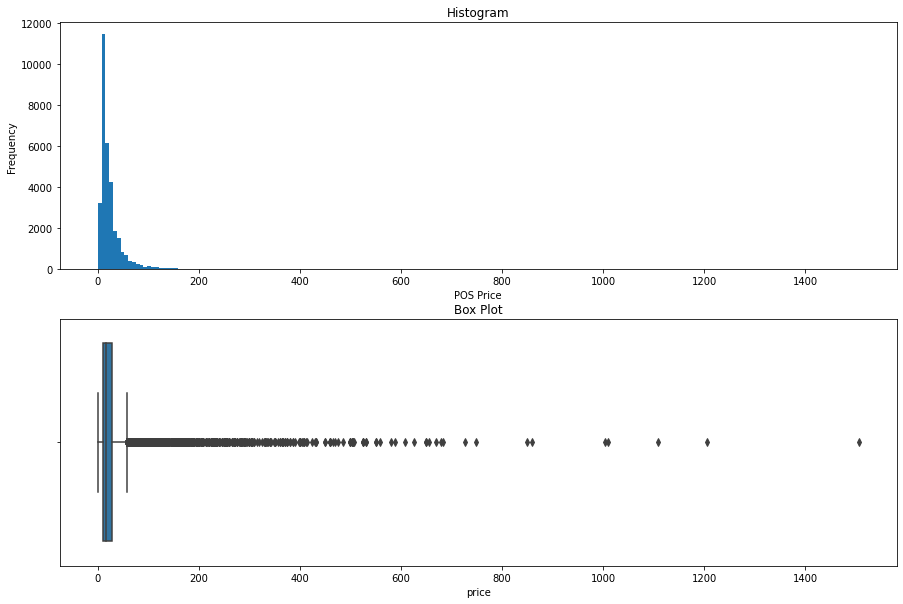

In [ ]:
print("Price range: ",'$',train["price"].min(), '-','$',train["price"].max())
fig, ax = plt.subplots(2, 1, figsize=(15,10))
ax[0].hist(train.price, bins = 200, range = [min(train.price), max(train.price)], label = "price")
ax[0].set_title("Histogram")
ax[0].set_xlabel("POS Price")
ax[0].set_ylabel("Frequency")
sns.boxplot(train.price, ax=ax[1])
ax[1].set_title("Box Plot")
plt.show()

# Logarithmically scaled sale price is more evenly distributed. This will be used for training phase.

4810 Unique brands


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


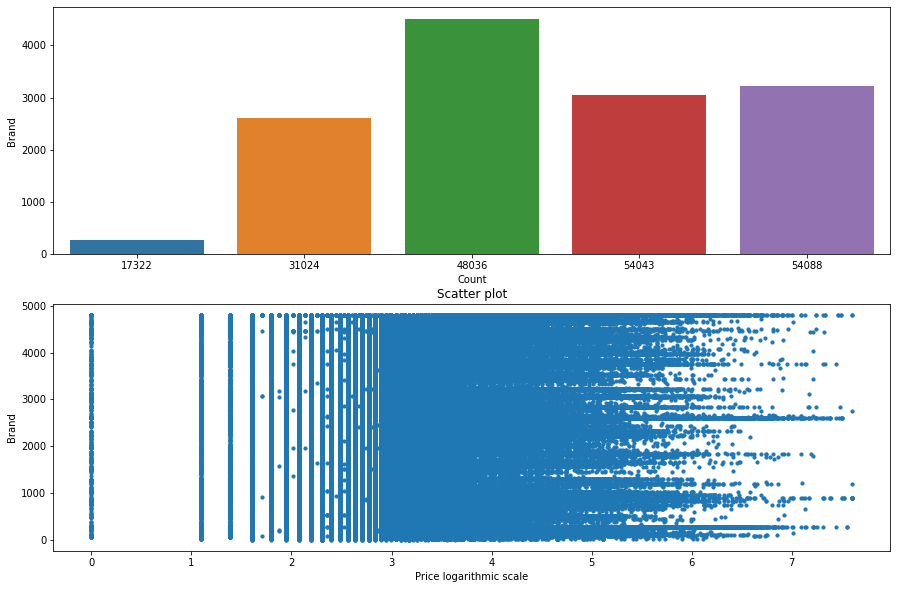

In [ ]:
print(train['brand_name'].value_counts().size, "Unique brands") # No of unique brands
brands_key = []
for i in range(0,5):
    brands_key.append(train['brand_name'].value_counts()[1:6].keys()[i])
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(train['brand_name'].value_counts()[1:6].values, brands_key , ax = ax[0])
f1 = train['price_log_scaled'].values
f2 = train['brand_name'].values

ax[1].set_title("Scatter plot")
ax[1].scatter(f1, f2, s=10)
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Brand")
ax[1].set_xlabel("Price logarithmic scale")
ax[1].set_ylabel("Brand")
plt.show()


Not sure what to make of this

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


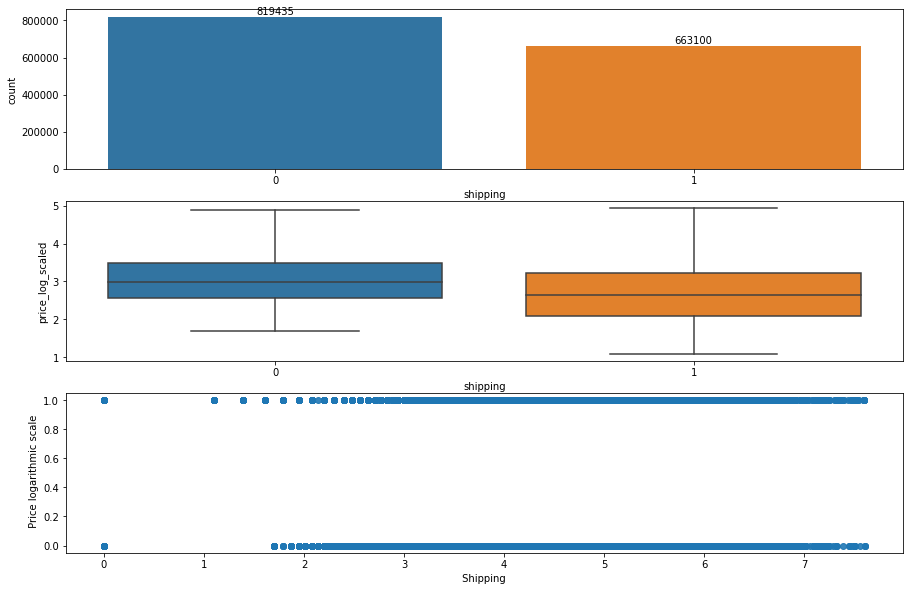

In [ ]:
fig, ax = plt.subplots(3, 1, figsize = (15,10))
sns.countplot(train.shipping, ax = ax[0])
rectangles = ax[0].patches
labels = train.shipping.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = train.shipping, y = train.price_log_scaled,showfliers = False, orient = "v", ax = ax[1])
ax[2].scatter(x = train.price_log_scaled, y = train.shipping,alpha=0.9)
ax[2].set_xlabel(" Shipping ", fontsize = 10)
ax[2].set_ylabel(" Price logarithmic scale", fontsize = 10)
plt.show()

# Picking models and training

# Random forest regression

In [ ]:
X_train_rf = train.drop(['price', 'price_log_scaled', 'price_cat'], axis=1)
Y_train_rf = train['price_log_scaled']
X_train, X_test, Y_train, Y_test = train_test_split(X_train_rf, Y_train_rf, test_size=0.1, random_state=0)

In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 randomforest = RandomForestRegressor(n_jobs=-1, min_samples_leaf=10, n_estimators=200)
 randomforest.fit(X_train, Y_train)

In [ ]:
 train_predict = randomforest.predict(X_train)
 validation_predict = randomforest.predict(X_test)
 table = [['Score', 'Training', 'Valdation'], 
          ['MSE', '{} '.format(round((mean_squared_error(Y_train, train_predict)), 5)), '{} '.format(round((mean_squared_error(Y_test, validation_predict)), 5))], 
          ['RMSE', '{} '.format(round((np.sqrt(mean_squared_error(Y_train, train_predict))), 2)), '{} '.format(np.sqrt(round((mean_squared_error(Y_test, validation_predict)), 5)))], 
          ['R2_Score', '{} '.format(round((r2_score(Y_train, train_predict)), 5)), '{} '.format(round((r2_score(Y_test, validation_predict)), 5))]]
 print(tabulate(table, headers='firstrow', tablefmt='grid'))

# Looks ok I guess?
Training took solid 5 minutes

# Trying LightGBM instead

In [ ]:
import lightgbm as lgb
from tabulate import tabulate

from sklearn.metrics import mean_squared_error, r2_score
lgbregressor = lgb.LGBMRegressor(objective='regression', num_leaves=100, learning_rate=0.2, n_estimators=500, boosting_type='goss')                                
lgbregressor.fit(X_train, Y_train)
train_predict = lgbregressor.predict(X_train)
validation_predict = lgbregressor.predict(X_test)
table = [['Score', 'Training', 'Valdation'], 
         ['MSE', '{} '.format(round((mean_squared_error(Y_train, train_predict)), 5)), '{} '.format(round((mean_squared_error(Y_test, validation_predict)), 5))], 
         ['RMSE', '{} '.format(round((np.sqrt(mean_squared_error(Y_train, train_predict))), 2)), '{} '.format(np.sqrt(round((mean_squared_error(Y_test, validation_predict)), 5)))], 
         ['R2_Score', '{} '.format(round((r2_score(Y_train, train_predict)), 5)), '{} '.format(round((r2_score(Y_test, validation_predict)), 5))]]
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------+------------+-------------+
| Score    |   Training |   Valdation |
+==========+============+=============+
| MSE      |    0.29907 |     0.31944 |
+----------+------------+-------------+
| RMSE     |    0.55    |     0.56519 |
+----------+------------+-------------+
| R2_Score |    0.52381 |     0.48332 |
+----------+------------+-------------+


Training time is reduced significantly ~20 times faster

Some tweakings required

# Predict test.tsv

In [ ]:
!ls /kaggle/input
!apt-get install p7zip
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z
!unzip /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip

mercari  mercari-price-suggestion-challenge



Suggested packages:
  p7zip-full
The following NEW packages will be installed:
  p7zip
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 358 kB of archives.
After this operation, 996 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 p7zip amd64 16.02+dfsg-6 [358 kB]
Fetched 358 kB in 2s (197 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package p7zip.
(Reading database ... 95327 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-6_amd64.deb ...
Unpacking p7zip (16.02+dfsg-6) ...
Setting up p7zip (16.02+dfsg-6) ...

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input

In [ ]:
predictions = np.exp(lgbregressor.predict(test))
submission_data = pd.DataFrame()
submission_data['test_id']=test['test_id']
submission_data['price']=predictions
submission_data.to_csv('submission.csv', index=False)